<a href="https://colab.research.google.com/github/sarveshrastogi1/ML_Lab_1bm22cs247/blob/main/logestic_1bm22cs247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data (2).csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


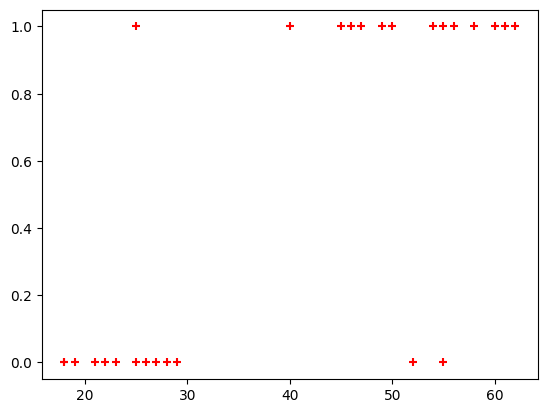

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

(24, 1)

In [ ]:
X_test

,age
7,60
5,56
18,19


In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test

,age
7,60
5,56
18,19


In [ ]:
y_test

,bought_insurance
7,1
5,1
18,0


In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 0])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.predict_proba(X_test)

array([[0.06470655, 0.93529345],
       [0.10327333, 0.89672667],
       [0.92775258, 0.07224742]])

In [ ]:
y_predicted = model.predict([[60]])
y_predicted

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[0.1274065]])

In [ ]:
#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

array([-4.97339194])

In [ ]:
#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

Dataset Head:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  


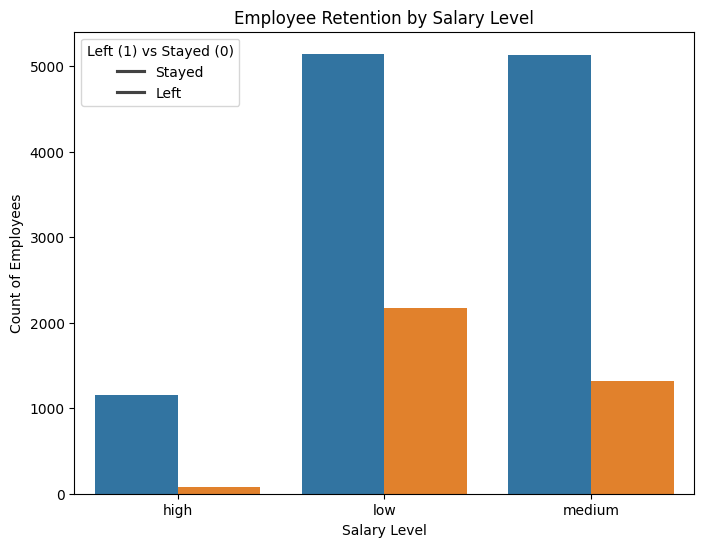


Department vs Retention:
      Department  left  count
0            IT     0    954
1            IT     1    273
2         RandD     0    666
3         RandD     1    121
4    accounting     0    563
5    accounting     1    204
6            hr     0    524
7            hr     1    215
8    management     0    539
9    management     1     91
10    marketing     0    655
11    marketing     1    203
12  product_mng     0    704
13  product_mng     1    198
14        sales     0   3126
15        sales     1   1014
16      support     0   1674
17      support     1    555
18    technical     0   2023
19    technical     1    697


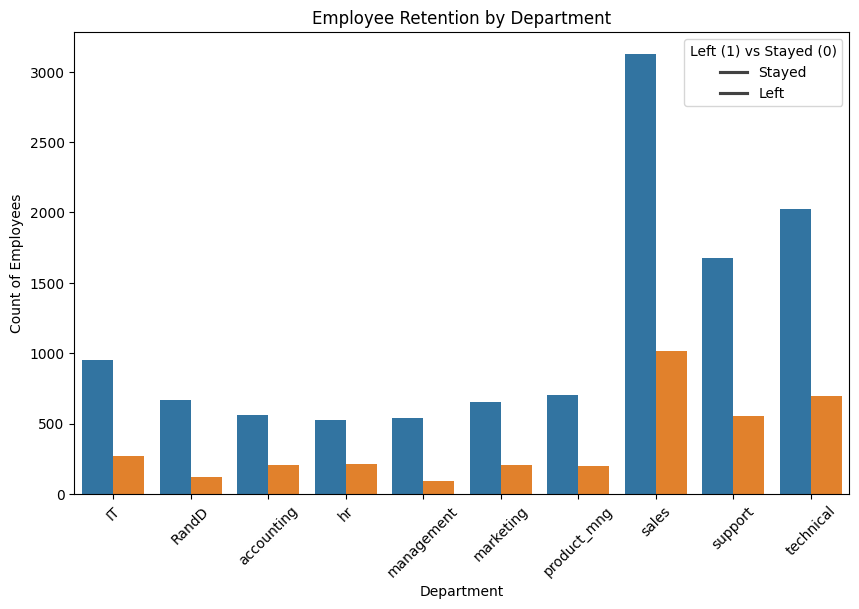


Logistic Regression Model Accuracy: 0.75

Confusion Matrix:
[[2079  215]
 [ 533  173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2294
           1       0.45      0.25      0.32       706

    accuracy                           0.75      3000
   macro avg       0.62      0.58      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------
# 1. Load the Dataset
# ---------------------------
df = pd.read_csv("/content/HR_comma_sep (1).csv")
print("Dataset Head:")
print(df.head())

# ---------------------------
# 2. Exploratory Data Analysis (EDA)
# ---------------------------
# Basic dataset info and description
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# Compute correlation matrix for numerical features only
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix (Numerical Columns Only):")
print(corr_matrix['left'].sort_values(ascending=False))

# ---------------------------
# 3. Plotting Bar Charts
# ---------------------------

# (a) Impact of employee salary on retention
salary_retention = df.groupby(['salary', 'left']).size().reset_index(name='count')
print("\nSalary vs Retention:\n", salary_retention)

plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='count', hue='left', data=salary_retention)
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count of Employees')
plt.legend(title='Left (1) vs Stayed (0)', labels=['Stayed', 'Left'])
plt.show()

# (b) Correlation between department and employee retention
dept_retention = df.groupby(['Department', 'left']).size().reset_index(name='count')
print("\nDepartment vs Retention:\n", dept_retention)

plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='count', hue='left', data=dept_retention)
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.legend(title='Left (1) vs Stayed (0)', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# 4. Building a Logistic Regression Model
# ---------------------------
# Based on the EDA, choose the following features:
# Numerical: satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, promotion_last_5years
# Categorical: salary, Department (encoded)

# Encode categorical variables
le_salary = LabelEncoder()
df['salary_enc'] = le_salary.fit_transform(df['salary'])

le_dept = LabelEncoder()
df['dept_enc'] = le_dept.fit_transform(df['Department'])

# Select features
features = ['satisfaction_level', 'time_spend_company',
            'salary_enc', 'dept_enc']
X = df[features]
y = df['left']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# ---------------------------
# 5. Model Evaluation
# ---------------------------
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nLogistic Regression Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Dataset Head:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


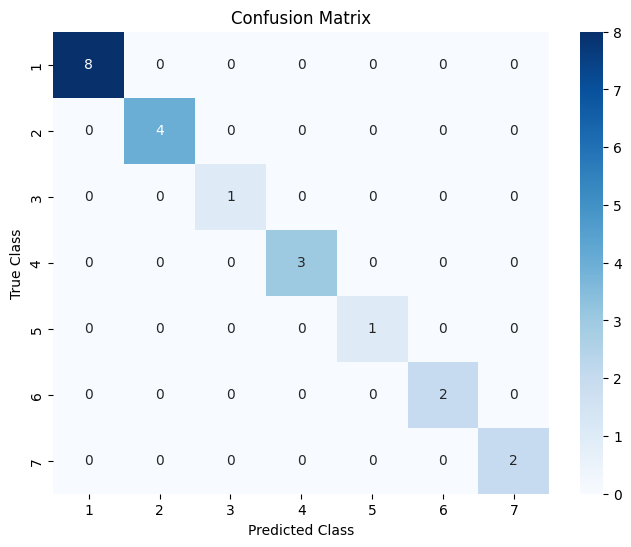

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------
# 1. Load the Dataset
# ---------------------------
df = pd.read_csv("/content/zoo-data (1).csv")

# Display dataset head
print("Dataset Head:")
print(df.head())

# ---------------------------
# 2. Exploratory Data Analysis (EDA)
# ---------------------------
print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe(include='all'))

# Check unique class types
print("\nUnique Class Types:")
print(df['class_type'].unique())

# ---------------------------
# 3. Data Preprocessing
# ---------------------------
# Drop 'animal_name' since it's just an identifier and not useful for prediction.
df = df.drop(columns=['animal_name'])

# Splitting features and target variable
X = df.drop(columns=['class_type'])  # Features (all except class_type)
y = df['class_type']  # Target variable

# Standardize the features (recommended for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 4. Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ---------------------------
# 5. Building the Logistic Regression Model
# ---------------------------
# Using multinomial logistic regression for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# ---------------------------
# 6. Model Evaluation
# ---------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------
# 7. Confusion Matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
